## 이번 강의 목표 

* 선형회귀 모델의 이해  
> * 단순 회귀 모델, 다중 회귀 모델, 다항 회귀 모델 등 


* 최적화 알고리즘: 경사 하강법  
> * 경사 하강법의 이해와 구현(경사 하강법의 문제점)  
> * 경사 하강법에서 하이퍼파라미터 학습률의 역할  
> * 경사 하강법의 여러 가지 방법: 배치 경사 하강법, 확률적 경사 하강법, 미니배치 경사 하강법 


* 데이터의 전처리 과정에서 스케일링(정규화)가 필요한 이유와 그 방법 및 구현


* 선형회귀 모델의 성능 평가 측도  
> * 교차검증을 통한 MSE  
> * $R^2$


* 일반화 오차에 대한 편향-분산 분해(bias-variance decomposition)에 대한 이해  
> * 과소적합(underfit)과 과대적합(overfit)에 대한 이해 


* 복습이 필요한 Numpy 함수:
> * `np.random.rand`  ([API](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html?highlight=rand#numpy.random.rand))   
> * `np.random.randn` ([API](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html?highlight=randn#numpy.random.randn))  
> * `np.column_stack` ([API](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html?highlight=column_stack#numpy.column_stack))
> * `np.ones` ([API](https://numpy.org/doc/stable/reference/generated/numpy.ones.html?highlight=ones#numpy.ones))  
> * `np.ndarray.dot` ([API](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dot.html?highlight=dot#numpy.ndarray.dot))  
> * `np.ndarray.T` ([API](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html?highlight=t#numpy.ndarray.T))  
> * `np.random.randint` ([API](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html?highlight=randint))  
> * `np.ravel` ([API](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ravel.html?highlight=ravel#numpy.ndarray.ravel))  
> * `np.random.permutation` ([API](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html?highlight=permutation#numpy.random.permutation))  
> * `np.ndarray.all` ([API](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.all.html?highlight=all))


* 사용할 sklearn 모듈 및 메소드   

        from sklearn.preprocessing    import MinMaxScaler, StandardScaler, PolynomialFeatures
        from sklearn.model_selection  import train_test_split
        from sklearn.metrics          import mean_square_error, r2_score
        
        from sklearn.linear_model     import LinearRegression, SGDRegressor
        from sklearn.linear_model     import SGDRegressor



* 도움이 되는 내용   
> * 선형대수학에서 배운 최소제곱법  
> * 선형대수학에서 배운 특잇값 분해와 유사역행렬 
> * 일변수, 다변수 함수에 대한 테일러 급수, 테일러 정리 ([다변수 함수에 대한 테일러 정리 링크](https://en.wikipedia.org/wiki/Taylor%27s_theorem)) 


* 선형회귀 모델의 모델 파라미터와 성능 분석 및 해석에 대한 참고 도서  
> * An Introduction to Statistical Learning([7판 PDF 링크](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)) 3장 (pp.59~109)  
>> * 이 강의에서는 수강생의 통계학에 대한 이해 정도에 차이가 있어, 통계학적 분석에 대한 내용을 깊게 다루지는 않고, 학습 알고리즘에 초점을 맞춤  
>> * 학습 모델의 성능에 대한 평가는 여러 가정에 기반한 통계적 해석보다는 교차검증을 이용한 성능 평가  
>> * 선형회귀 모델에서 구한 각 파라미터에 대한 표본오차, 신뢰구간, 모델 파라미터와 예측(레이블) 사이의 연관성에 대한 가설검정, `p-value` 등의 의미에 대해서는 위 참고 도서를 읽어볼 것 

## 선형모델

* 기계학습에서 **선형모델**이란 다음 학습모델들을 통칭하는 용어 

> 회귀문제에서 특성벡터 $\mathbf x=(x_1,\cdots,x_n)^{\rm T}$의 특성값 $x_i\, (i=1,\cdots,n)$에 대한 선형결합으로 레이블 $y$를 예측하는 학습모델

> 분류문제에 대한 판별경계를 특성값에 대한 선형결합을 이용하여 결정하는 학습모델 

## 선형회귀 학습모델 

* 지도학습

* 훈련 데이터셋 $\{(\mathbf x_i,y_i)|1\le i \le m\}$ (단, $\mathbf x_i=(x_{i1},\cdots,x_{in})^{\rm T}$)에 대한 학습모델을 다음과 같이 각 특성값에 대해 선형이 되도록 가정하는 판별모델의 일종 

$$\hat y = \theta_0 +\theta_1 x_1+\cdots +\theta_nx_n$$

> * 편향(또는 절편) $\theta_0$와 가중치 $\theta_i\, (1\le i\le n)$를 합쳐서 모델 파라미터   

> * $n$차원 특성벡터 $\mathbf x=(x_1,\cdots,x_n)^{\rm T}$를 $\mathbf x=(1,x_1,\cdots,x_n)^{\rm T}$로 쓰고(즉, $x_0=1$), $\boldsymbol{\theta} = (\theta_0,\theta_1,\cdots,\theta_n)^{\rm T}$로 나타내면 위 모델은 $\hat y = h_{\boldsymbol{\theta}}(\mathbf x)=\theta^{\rm T}\mathbf x$로 간단히 나타낼 수 있음 

> * 모든 훈련샘플의 특성 벡터를 $m\times (n+1)$행렬 $\mathbf X=(x_{ij})$로 나타낼 때, 
$$\hat {\mathbf y} = (\hat y_1,\cdots,\hat y_m)^{\rm T} = \mathbf X \boldsymbol{\theta}$$

> * $n=1$일 때를 **단순선형회귀 모델**, $n>1$일 때를 **다중선형회귀 모델**이라고 함  

> * 고려하는 특성 벡터가 주어진 속성 벡터의 속성들끼리의 곱으로 새로운 속성을 추가하여 얻어진 특성 벡터일 때, **다항 회귀(polynomial regression)**이라고 함  
>> * 이 아이디어를 확장하면 비선형 데이터에 대한 회귀 모델을 구성하는 것이 가능 (예를 들어, 비선형 함수 $f(x)$에 대해 특성값 $f(x_i)$를 이용)

* 이 모델을 학습시킨다는 것은 모델이 훈련 데이터셋 가장 잘 맞도록 모델 파라미터 $\boldsymbol{\theta}$를 설정하는 것. 실제로는 다음과 같이 정의되는 **평균제곱오차(MSE:Mean Square Error)**가 최소가 되는 $\boldsymbol{\theta}$를 설정 
$$ \text{MES}(\boldsymbol{\theta})=\bigl(\text{ 또는 손실함수 }L(\boldsymbol{\theta})\bigr) = \dfrac 1 m \sum_{i=1}^m(\hat y_i -y_i)^2
=\dfrac 1 m (\hat{\mathbf y}-\mathbf y)^{\rm T} (\hat{\mathbf y}-{\mathbf y})=\dfrac 1 m (\mathbf X\boldsymbol{\theta}-\mathbf y)^{\rm T}(\mathbf X\boldsymbol{\theta}-\mathbf y) \cdots (1)$$

> * MSE가 최소가 되는 $\boldsymbol{\theta}$를 구하는 것은 **RSS(Residual Sum of Square)**$=\sum_{i=1}^m (\hat y_i - y_i)^2$이 최소가 되는 $\boldsymbol{\theta}$를 구하는 것과 같음  

> * MSE는 일종의 비용함수(cost function)

> * 위와 같이 비용함수 MSE가 최소가 되는 $\boldsymbol{\theta}$를 구하는 것을 다르게 해석할 수도 있음 
$$ $$
>> * 어떤 함수 $f(\mathbf x)=\theta_0+\theta_1x_1+\cdots+\theta_nx_n$에 대해, $X=\mathbf x$가 주어질 때, $Y|{\mathbf x}$가 평균이 $f(\mathbf x)$이고 분산이 $\sigma^2$인 정규분포를 따른다고 가정할 때, $\epsilon\sim N(0,\sigma^2)$에 대해 
다음이 성립 
$$Y=f(X)+\epsilon$$   
>> * <span style="color:blue"> 각 샘플 $(\mathbf x_i,y_i)$에 대응되는 $\epsilon_i$가 독립동일분포를 따른다고 가정  $\cdots\cdots$ (*)</span>
$$ $$
>> * 즉, $\boldsymbol{\theta}^{\rm T}=(\theta_0,\cdots,\theta_n),\, \mathbf x^{\rm T}=(1,x_1,\cdots,x_n)$라 할 때,  $Y|\mathbf x \sim N(\mathbf x^{\rm T}\boldsymbol{\theta}, \sigma^2)$     
$$ $$
>> * 따라서, 훈련 데이터셋이 주어질 때, $\boldsymbol{\theta}$에 대한 로그우도함수 $\ln p(y_1,\cdots,y_m|\mathbf x_1,\cdots,\mathbf x_m;\boldsymbol{\theta})=\sum_{i=1}^m \ln p(y_i|\mathbf x_i;\boldsymbol{\theta})$가 최대가 되는 $\boldsymbol{\theta}$를 구하는 것은 위 식 (1)이 최대가 되는 $\boldsymbol{\theta}$를 구하는 것과 같음을 보일 수 있음  (<span style="color:red"> check 1</span>)

## 선형회귀 모델의 학습 1(해석적 방법을 통해 해를 구하기)

* 식 (1)에서 손실함수 $L(\boldsymbol{\theta})$는 모델 파라미터 $\theta_0,\cdots,\theta_n$에 대해 이차식이므로 $\nabla_{\boldsymbol{\theta}} L(\boldsymbol{\theta})=\mathbf 0$를 만족하는 $\boldsymbol{\theta}=\hat{\boldsymbol{\theta}}$에서 최소가 된다.  

> * 그래디언트를 열벡터: $\nabla_{\boldsymbol{\theta}} L(\boldsymbol{\theta}) = \left(\dfrac{\partial L}{\partial \theta_0}(\boldsymbol{\theta}),\cdots,\dfrac{\partial L}{\partial \theta_n}(\boldsymbol{\theta})\right)^{\rm T}$
> * 다음 조건
$$(\nabla_{\boldsymbol{\theta}} L(\boldsymbol{\theta})) = \dfrac 2 m \mathbf X^{\rm T}(\mathbf X\boldsymbol{\theta}-\mathbf y)=\mathbf 0 \cdots \cdots (2)$$
이 성립하는 $\hat{\boldsymbol{\theta}}$를 구하면 
$$\hat{\boldsymbol{\theta}} = (\mathbf X^{\rm T}\mathbf X)^{-1}\mathbf X^{\rm T}\mathbf y$$
$$ $$
> * 또 다른 방법으로 선형대수학에서 배운 최소제곱법을 이용하면 위의 해를 얻을 수 있음  
>> * $\mathbf X \boldsymbol{\theta} \approx \mathbf y \Longrightarrow \mathbf X^{\rm T}\mathbf X \boldsymbol{\theta} =\mathbf X^{\rm T}\mathbf y \Longrightarrow \boldsymbol{\theta} = (\mathbf X^{\rm T}\mathbf X)^{-1}\mathbf X^{\rm T}\mathbf y$
$$$$
>> * 즉, 훈련 데이터셋의 레이블로 이루어진 벡터 $\mathbf y=(y_1,\cdots,y_m)^{\rm T}$에 대해 선형회귀 모델로 얻어진 예측 레이블 벡터 $\hat{\mathbf y}=(\hat y_1,\cdots,\hat y_m)^{\rm T}$는 $$\hat{\mathbf y}= \mathbf X(\mathbf X^{\rm T}\mathbf X)^{-1}\mathbf X^{\rm T}\mathbf y$$가 되고, 이는 $\mathbf y$를 행렬 $\mathbf X$의 $n+1$개의 열벡터들로 이루어진 부분공간에 정사영 내린 벡터가 $\hat{\mathbf y}$임을 의미 

* 위 식에서 $\mathbf X^{\rm T}\mathbf X$가 역행렬을 가질 필요충분조건은 행렬 $\mathbf X$의 각 열벡터들이 일차독립인 것 

> * $m<n$이거나 어떤 특성이 중복 또는 다른 특성들의 일차결합으로 표현된다면 역행렬이 존재하지 않음 
$$$$
> * $(n+1)\times (n+1)$행렬 $\mathbf X^{\rm T}\mathbf X$의 역행렬을 계산하는 계산복잡도는 $O(n^{2.4})$에서 $O(n^3)$사이
>> 즉, 특성 수가 두 배로 늘어나면 계산 시간이 대략 $5.3$배에서 $8$배 사이로 증가  
> * 역행렬을 구하지 않고, $\mathbf X$의 특잇값분해 $\mathbf X=\mathbf U\mathbf{\Sigma} \mathbf V^{\rm T}$를 이용하여 유사역행렬 $\mathbf X^{+}=\mathbf V \mathbf{\Sigma}^{-1}\mathbf U^{\rm t}$을 구하고 (계산복잡도 $O(n^2)$)면, 
$$\hat {\boldsymbol{\theta}} = \mathbf X^{+}\mathbf y$$  
>> * $\because (\mathbf X^{\rm T}\mathbf X)^{-1}\mathbf X^{\rm T}= 
(\mathbf{V\Sigma U^{\rm T}\,U\Sigma V^{\rm T}})^{-1} \mathbf{V\Sigma U^{\rm T}}
=\mathbf{V \Sigma^{-2} V^{\rm T}\, V \Sigma U^{\rm T}} =\mathbf X^{+} $  
$$$$
>> * 이 방법의 장점은 $\mathbf X^{\rm T}\mathbf X$가 역행렬을 갖지 않을 때도 근사해를 항상 구할 수 있음 
$$$$
>> * 특성 수 $n$에 대해서는 계산복잡도가 $O(n^2)$이지만, 샘플 수 $m$에 대해서는 $O(m)$  ($\because \mathbf X^{+}\mathbf y$를 계산할 때)

* <span style="color:blue">sklearn.linear_model 모듈의 LinearRegression</span>은 위에서 설명한 특잇값 분해를 이용하여 구현되어 있는 선형회귀 모델 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression))

## 선형회귀 모델의 학습 2(수치해석적 방법으로 해를 구하기)

* 여러 종류의 문제에서 적용가능한 일반적인 최적화 알고리즘인 경사 하강법과 기본적인 변형에 대해 공부

* 심층신경망(deep learning)에서는 표준적인 경사 하강법보다 보다 훨씬 빠른 고속 옵티마이저(Adam, RMSProp 등)을 사용

### 경사 하강법(gradient descent)

* 경사 하강법의 기본 아이디어는 비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것 (구현 방법에 따라 **배치 경사 하강법**, **확률적 경사 하강법**, **미니배치 경사 하강법** 등이 있음):

> * 다변수 함수에 대한 테일러 정리에 의해 $||\boldsymbol{\theta}-\mathbf a||$가 충분히 작으면 다음이 성립
$$L(\boldsymbol{\theta})\approx L(\mathbf a)+\bigl(\nabla_{\theta}L(\mathbf a)\bigr)^{\rm T}(\boldsymbol{\theta}-\mathbf a)$$
$$$$
>> * 그래디언트 방향은 함수값이 가장 빨리 커지는 방향
> * $\boldsymbol{\theta}=\mathbf a - \alpha \nabla_{\boldsymbol{\theta}}L(\mathbf a)$에서 $\alpha||\nabla_{\boldsymbol{\theta}}L(\mathbf a)||$가 충분히 작아지게 $\alpha>0$을 조절하면 다음이 성립
$$L(\boldsymbol{\theta})=L\bigl(\mathbf a-\alpha \nabla_{\boldsymbol{\theta}}L(\mathbf a)\bigr) \approx 
L(\mathbf a)-\alpha \bigl(\nabla_{\boldsymbol{\theta}}L(\mathbf a)\bigr)^{\rm T}\nabla_{\boldsymbol{\theta}}L(\mathbf a)< L(\mathbf a)$$
$$$$
> * 따라서, 초깃값 $\boldsymbol{\theta}^{(0)}$로부터 시작하여 다음
$$\boldsymbol{\theta}^{(t+1)}:= \boldsymbol{\theta}^{(t)}-\alpha \nabla_{\boldsymbol{\theta}}L(\boldsymbol{\theta}^{(t)})\ (t\ge 0) \ \cdots \cdots (3)
$$
과 같이 반복적으로 $\boldsymbol{\theta}^{(t)}$를 업데이트시키면 
$$L(\boldsymbol{\theta}^{(0)})> L(\boldsymbol{\theta}^{(1)})> \cdots $$
과 같이 $L(\boldsymbol{\theta}^{(t)})$는 적절한 가정하에서 극솟값 $L(\hat{\boldsymbol{\theta}})$로 수렴함을 보일 수 있음  
>> * 예를 들어, **립시츠 연속(Lipshitz continuous)**인 함수의 경우에, 그래디언트가 일정한 범위에서만 변하는 것을 이용하여 경사 하강법이 수렴함을 보일 수 있음 : ([립시츠 연속](https://en.wikipedia.org/wiki/Lipschitz_continuity))

* 경사 하강법에서 중요한 하이퍼파라미터는  **학습률(learning rate)** $\alpha$
> * 학습률이 너무 작으면 수렴하는데 시간이 오래 걸리고, 너무 커도 시간이 오래 걸리거나 경우에 따라 수렴하지 않을 수도 있음 (아래 그림에서는 왼쪽의 학습률보다 오른쪽의 학습률이 큰 경우)
 <img src=".\images\week6\gd_alpha1.png" width="600">  

> * 다양한 스케쥴링 방법에 따라 학습률을 조절하는 변형 알고리즘들이 있음  
 
* 선형회귀 모델의 MSE처럼 함수가 **볼록함수(convex function)**인 경우, 하나의 최솟값만 존재하므로 경사 하강법으로 최솟값을 찾을 수 있지만, 극솟값이 존재하는 함수의 경우에는 최솟값이 아닌 극솟값으로 수렴할 수 있음 
> * 경사 하강법에서 초깃값을 바꿔가면서 시도하는 방법, 확률적 경사 하강법 등 변형을 사용하는 방법 

* <span style="color:red">경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 함</span> (그렇지 않으면 수렴하는데 훨씬 오랜 시간이 걸림)
> * 특성이 같은 스케일을 갖도록 만드는 과정을 **특성 스케일링(feature scaling)** 또는 **정규화(normalization)**이라고 함 
> * 예를 들어, 2차원 특성벡터 $\mathbf x=(x_1,x_2)$의 $x_1$의 값이 $x_2$의 값보다 더 작은 훈련 데이터셋에 대해 
 <img src=".\images\week6\normal_scaling.png" width="500"> 

* <span style="color:red"> 특성 스케일링 / 정규화</span>
> * **min-max 스케일링**  
>> * 모든 특성값이 $0$과 $1$사이가 되도록 데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나눔  
>> * <span style="color:blue"> sklearn.preprocessing 모듈의 MinMaxScaler 변환기를 이용</span>할 수 있음 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler))
$$$$
> * **표준화(standardization)**  
>> * 샘플의 각 속성별로 평균을 뺀 후, 표준편차로 나누어 결과 분포의 분산이 $1$이 되도록 조정  
>> * 표준화 방식은 범위의 상한과 하한이 없어서 종종 $0$에서 $1$사이의 입력값을 기대하는 심층신경망에서는 문제가 될 수 있음  
>>  <span style="color:blue"> sklearn.preprocessing 모듈의 StandardScaler 변환기를 이용</span>할 수 있음 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler))
> * min-max 스케일링은 이상치에 영향을 많이 받지만, 표준화는 이상치에 영향을 덜 받음  
> * <span style="color:red"> 모든 스케일링 변환기에서 스케일링은 테스트 데이터셋을 제외한 훈련 데이터셋에 대해서만 `fit()` 메소드를 적용해야 함.</span>

## 경사 하강법의 구현 

* 경사 하강법에서 그래디언트를 업데이트시킬 때, 훈련 데이터셋을 모두 사용하여 업데이트시키는 반복 단위를 **에포크(epoch)**라고 함 

#### 배치 경사 하강법(batch gradient descent)

* 경사 하강법의 (3)을 반복적으로 계산할 때, 손실함수에 대한 그래디언트 벡터를 식 (2)와 같이 훈련 데이터셋 전체에 대해 계산하는 알고리즘   
> * 매우 큰 훈련 데이터셋에서는 느림  
> * 특성 수에는 민감하지 않으므로 선형회귀를 학습시킬 때, 역행렬을 구하거나 특이값 분해(SVD)를 이용하여 학습시키는 것보다 훨씬 빠름 

* 적절한 학습률을 결정하는 방법: 
> * 그리드 탐색법을 이용하여 탐샘  
> * 그리드 탐색에서 수렴하는데 시간이 너무 오래 걸리는 것을 방지하기 위해 반복 횟수를 제한 
>> * 반복 횟수를 제한하는 효율적인 방법은 반복 횟수를 아주 크게 지정하고, 그레디언트 벡터의 노름이 어떤 값 (허용오차 tolerance)보다 작아지면 알고리즘을 중지하는 방법 



#### 확률적 경사 하강법(SGD: Stochastic Gradient Descent)

* 확률적 경사 하강법은 배치 경사 하강법과 달리 (3)을 계산하는 매 단계에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대해 그레디언트를 업데이트(이 경우 식 (2)의 그래디언트 식에서 $m=1$)  
> * 비용함수가 최솟값에 도달할 때까지 부드럽게 감소하지 않고 요동치지면서 평균적으로 최솟값에 근접  
$$$$  
> * 평균적으로 파라미터가 최솟값을 향해 진행하는 것을 보장하려면 파라미터를 업데이트할 때 사용하는 훈련 샘플이 독립동일분포(i.i.d)를 만족해야 함 
$$$$
> * 위 조건을 만족하도록 구현하기 위해 한 에포크에서 훈련 데이터셋을 랜덤하게 섞은 후 하나씩 차례로 업데이트에 사용하고, 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있음 


* 확률적 경사 하강법의 장점:
> * 배치 경사 하강법은 매 스텝에서 전체 훈련 데이터셋을 사용하므로 훈련 데이터셋이 커지면 매우 느리지만, 확률적 경사 하강법은 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 빠르고 매우 큰 훈련 데이터셋에 대해서도 학습이 가능함  
$$$$
> * 비용함수가 여러 개의 극솟값을 갖는 경우, 요동치며 특성으로 인해 극솟값을 건너 뛰는데 도움을 주어 배치 경사 하강법보다 최솟값에 근접할 가능성이 높음 


* 확률적 경사 하강법의 단점:
> * 반면에 확률적이므로 이 알고리즘은 배치 경사 하강법에 비해 훨씬 불안정함  
$$$$
> * 최적치에 근접한 값에 대응되는 좋은 파라미터를 구할 순 있지만, 최적치는 아님 


* 무작위성이 갖는 장점과 단점의 딜레마를 해결하기 위해서 학습률을 점진적으로 감소시키는 방법을 적용  
> * 시작할 때는 학습률을 크게 하여 극솟값에 빠지지 않게 하고, 점차 줄여서 최솟값에 도달하도록 도와줌  
$$$$
> * 학습률을 결정하는 함수를 **학습 스케쥴(learning schedule)**  
>> 예를 들어, 학습 스케쥴 함수 $f$를 $\displaystyle{f(t) = \dfrac{t_0}{t+t_1}}$으로 잡을 수 있음 (단, $t_0,\,t_1$은 학습 스케쥴 함수에 대한 하이퍼파라미터)

* <span style="color:blue"> sklearn.linear_model 모듈의 SGDRegressor</span>에 확률적 경사 하강법이 구현되어 있음 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html))
> * SGD 방식으로 선형회귀를 사용하려면 `SGDRegressor`의 입력 파라미터 중 `loss=’squared_loss'`(디폴트 값)을 이용하여 객체를 생성 
> * <span style="color:red">`fit()` 메소드의 입력으로 전달되는 y는 rank가 1인 넘파이 배열이어야 함 </span>
> * 그 외 중요한 입력 파라미터와 디폴트 값:  
>> * `max_iter=1000`는 에포크 횟수
>> * `tol=1e-3`는 한 에포크에서 0.001보다 적게 손실이 줄어들면 종료 
>> * `eta0=0.01`는 학습률 (`SGDRegressor`에서 `alpha`는 뒤에 배울 **규제(regularization)**와 관련된 파라미터)  
>> * `penalty=l2`는 규제의 종류 (규제없이 선형회귀를 할 때는 `penalty=None`으로 설정)  
>> * `learning_ratestring='invscaling'`는 학습 스케쥴 함수의 종류 (API 설명 참고)  
>> * `early_stopping=False`와 `validation_fraction=0.1`도 API 설명 확인 


#### 미니배치 경사 하강법(mini-batch gradient descent)   

* 매 업데이트에서 전체 훈련 데이터셋(배치 경사 하강법)나 하나의 샘플(확률적 경사 하강법)을 기반으로 그래디언트를 계산하는 것이 아니라 **미니배치**라고 부르는 작은 데이터셋 단위로 그래디언트를 계산  
> * GPU와 같이 행렬 연산에 최적화된 하드웨어를 이용할 때 성능 향상을 얻을 수 있음 

* 미니배치를 어느 정도 크게 하면 SGD보다 덜 불규칙적으로 움직이고, 최솟값에 좀 더 가깝게 도달 

## 경사 하강법 실습 (선형회귀에 대한 toy example)

* $Y=4+3X+\epsilon$ ($0\le X \le 2$)를 따르는 샘플 100개를 생성한 후 선형회귀를 적용 


* SVD를 이용한 선형회귀인 LinearRegression, SGD를 이용한 선형회귀인 SGDRegressor, 배치 경사 하강법, 미니배치 경사 하강법을 비교 실습 

(0.0, 2.0, 0.0, 15.0)

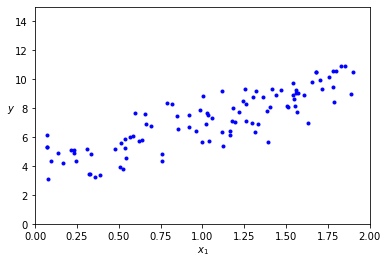

In [6]:
# 데이터 샘플 생성 

import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

import matplotlib.pyplot as plt 
%matplotlib inline

np.random.seed(20)

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X,y, 'b.')
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([0, 2, 0, 15])

In [7]:
# 각 특성벡터의 첫 번째 좌표에 bias에 대응되는 1을 추가하여 Xb로 수정 
# 여러 가지 경사 하강법을 직접 구현해 볼 때 사용

Xb = np.column_stack((np.ones((100,1)), X))

In [8]:
X_new = np.array([[0],[2]])
Xb_new = np.column_stack((np.ones((2,1)), X_new))

#### LinearRegression 이용 

* 학습을 시킨 후 bias값은 학습된 객체의 `intercept_`속성에서, 가중치는 `coef_`속성에서 확인 가능 

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg_svd = LinearRegression()

In [11]:
lin_reg_svd.fit(X,y)

LinearRegression()

In [13]:
lin_reg_svd.intercept_
lin_reg_svd.coef_

array([[3.23892352]])

In [4]:
lin_reg_svd = LinearRegression()
lin_reg_svd.fit(X, y)
theta_svd = np.array([lin_reg_svd.intercept_, lin_reg_svd.coef_],dtype=float)
theta_svd

array([[3.8115615 ],
       [3.23892352]])

In [5]:
y_predict_svd = lin_reg_svd.predict(X_new)
y_predict_svd

array([[ 3.8115615 ],
       [10.28940854]])

Text(0.5, 1.0, 'Linear regression with SVD')

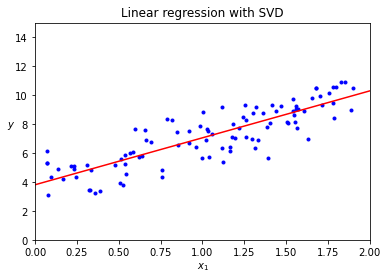

In [6]:
# 모델의 예측을 그래프에 나타내기 

plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict_svd, 'r-')
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([0, 2, 0, 15])
plt.title("Linear regression with SVD")

#### 배치 경사 하강법 1: 구현 

* 직접 구현해보고, 학습률에 따른 학습결과를 그림으로 비교해보자. 

* 그래디언트를 구하는 식 (2) 
$$(\nabla_{\boldsymbol{\theta}} L(\boldsymbol{\theta})) = \dfrac 2 m \mathbf X^{\rm T}(\mathbf X\boldsymbol{\theta}-\mathbf y)=\mathbf 0 $$

* $\boldsymbol{\theta}$를 업데이트하는 식 (3)
$$\boldsymbol{\theta}^{(t+1)}:= \boldsymbol{\theta}^{(t)}-\alpha \nabla_{\boldsymbol{\theta}}L(\boldsymbol{\theta}^{(t)})\ (t\ge 0)
$$

In [7]:
eta = 0.1 # 학습률 
n_epochs = 1000 # epoch 수 
m = 100 # 샘플수 

theta_bgd = np.random.randn(2,1)  # 무작위로 theta 초깃값 설정 

for iteration in range(n_epochs):
    gradients = 2/m * Xb.T.dot(Xb.dot(theta_bgd) -y)   # 설명의 식 (2) 구현
    theta_bgd = theta_bgd - eta * gradients                # 설명의 식 (3) 구현 

In [8]:
print(f"theta_bgd:\n {theta_bgd}")
print()
print(f"theta_svd:\n {theta_svd}")

theta_bgd:
 [[3.8115615 ]
 [3.23892352]]

theta_svd:
 [[3.8115615 ]
 [3.23892352]]


In [9]:
y_predict_bgd = Xb_new.dot(theta_bgd)

Text(0.5, 1.0, 'Linear regression with BGD (learning rate=0.1)')

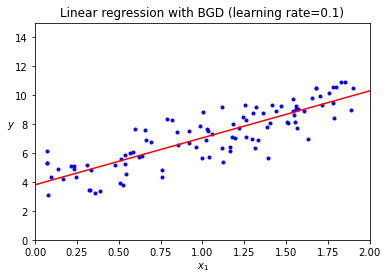

In [10]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict_bgd, 'r-')
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([0, 2, 0, 15])
plt.title(f"Linear regression with BGD (learning rate={eta})")

#### 배치 경사 하강법 2: 학습률에 따른 배치 경사 하강법 비교 

* 서로 다른 학습률에 대해 학습 정도를 확인하기 위해 무작위로 초기화된 $\boldsymbol{\theta}^{(0)}$ 부터 $\boldsymbol{\theta}^{(20)}$까지 업데이트된 각 $\boldsymbol{\theta}$에 대해 대응되는 직선을 그려 비교 

* 직선의 색과 투명도: 업데이트가 진행될 수록 불투명한 색   
> * 직선 $y=3x+4$: 빨간색   
> * $\boldsymbol{\theta}^{(0)}$에 대응되는 직선: 자홍색, 그 외 직선 초록색


In [11]:
theta_bgd_path = []

def plot_bgd(theta, eta, theta_path=None):
    m = len(Xb)
    plt.plot(X, y, "b.")
    plt.plot([0,2],[4,10], "r-")
    n_epochs = 1000
    for iteration in range(n_epochs):
        if iteration < 21:
            y_predict = Xb_new.dot(theta)
            if iteration == 0:
                plt.plot(X_new, y_predict, "m-", linewidth=1)
            else:
                plt.plot(X_new, y_predict, "g-", linewidth=1, alpha=0.05*iteration)
        gradients = 2/m * Xb.T.dot(Xb.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=10)
    plt.axis([0, 2, 0, 15])
    plt.title(f"$\eta = {eta}$", fontsize=11)

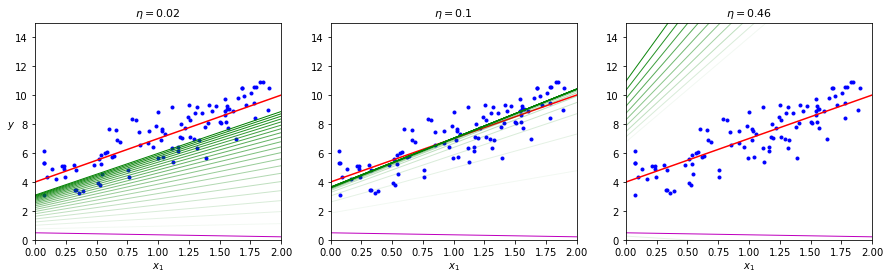

In [12]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(15,4))

plt.subplot(131); plot_bgd(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.subplot(132); plot_bgd(theta, eta=0.1, theta_path=theta_bgd_path)
plt.subplot(133); plot_bgd(theta, eta=0.46)

#### 확률적 경사 하강법 1: 직접 구현 

In [13]:
theta_sgd_path = []
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 
m = 100         # 샘플 수 

def learning_schedule(t):
    return t0/(t+t1)

theta_sgd = np.random.randn(2,1)  # theta 무작위 초기화 

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        tx = Xb[random_idx:random_idx+1]
        ty = y[random_idx:random_idx+1]
        gradients = 2 * tx.T.dot(tx.dot(theta_sgd) - ty)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients
        theta_sgd_path.append(theta_sgd)

In [14]:
print(f"theta_bgd:\n {theta_bgd}")
print()
print(f"theta_svd:\n {theta_svd}")
print()
print(f"theta_sgd:\n {theta_sgd}")

theta_bgd:
 [[3.8115615 ]
 [3.23892352]]

theta_svd:
 [[3.8115615 ]
 [3.23892352]]

theta_sgd:
 [[3.76987039]
 [3.29769301]]


#### 확률적 경사 하강법 2: 그림으로 학습 과정 파악하기 

* 학습과정 중 처음 $20$개의 $\boldsymbol(\theta)$에 대응하는 직선의 그래프를 그려보자. (업데이트 될 수록 직선이 진해지도록)

(0.0, 2.0, 0.0, 15.0)

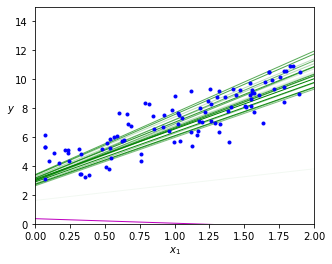

In [15]:
theta_sgd = np.random.randn(2,1)  # 랜덤 초기화
plt.figure(figsize=(5,4))

for i in range(21):
    y_predict_sgd = Xb_new.dot(theta_sgd)            
    if i==0:        
        plt.plot(X_new, y_predict_sgd, "m-", linewidth=1)
    else:
        plt.plot(X_new, y_predict_sgd, "g-", linewidth=1, alpha=0.05*i)
    random_idx = np.random.randint(m)
    tx = Xb[random_idx:random_idx+1]
    ty = y[random_idx:random_idx+1]
    gradients = 2 * tx.T.dot(tx.dot(theta_sgd) - ty)
    eta = learning_schedule(i)
    theta_sgd = theta_sgd - eta * gradients
    
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=10)                      
plt.ylabel("$y$", rotation=0, fontsize=10)           
plt.axis([0, 2, 0, 15])                               

#### 확률적 경사 하강법 3: `sklearn.linear_model` 모듈의 `SGDRegressor` 사용

In [16]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel()) # 2차원 배열 y를 1차원 배열로 

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.75972497]), array([3.16465032]))

#### 미니배치 경사 하강법 1: 구현

In [20]:
theta_mgd_path = []

n_epochs = 50
minibatch_size = 20

np.random.seed(42)
theta_mgd = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    Xb_shuffled = Xb[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        tx = Xb_shuffled[i:i+minibatch_size]
        ty = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * tx.T.dot(tx.dot(theta_mgd) - ty)
        eta = learning_schedule(t)
        theta_mgd = theta_mgd - eta * gradients
        theta_mgd_path.append(theta_mgd)

In [21]:
print(f"theta_mgd:\n {theta_mgd}")

theta_mgd:
 [[3.80536591]
 [3.25424808]]


#### 파라미터 공간에 표시된 경사 하강법의 경로 비교 

* 앞에서 계산해둔 `theta_bgd_path`, `theta_sgd_path`, `theta_mgd_path`에 각각 순차적으로 저장된 $(\theta_0,\theta_1)$값을 이용

In [22]:
theta_bgd_path = np.array(theta_bgd_path)
theta_sgd_path = np.array(theta_sgd_path)
theta_mgd_path = np.array(theta_mgd_path)

(2.5, 4.25, 2.3, 3.9)

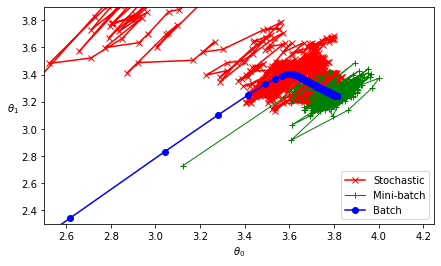

In [23]:
plt.figure(figsize=(7,4))
plt.plot(theta_sgd_path[:, 0], theta_sgd_path[:, 1], "r-x", linewidth=1.5, label="Stochastic")
plt.plot(theta_mgd_path[:, 0], theta_mgd_path[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(theta_bgd_path[:, 0], theta_bgd_path[:, 1], "b-o", linewidth=1.5, label="Batch")
plt.legend(loc="lower right", fontsize=10)
plt.xlabel(r"$\theta_0$", fontsize=10)
plt.ylabel(r"$\theta_1$   ", fontsize=10, rotation=0)
plt.axis([2.5, 4.25, 2.3, 3.9])

## 선형회귀 모델에 대한 성능 평가 

* 선형회귀 모델의 경우에는 통계학적으로 많은 분석이 이루어진 모델 (이 강의에서는 자세히 다루지 않음, 관련 통계학 과목 참고) 
> * $p(y|\mathbf x)=N(\mathbf x^{\rm T}\boldsymbol{\theta},\sigma^2)$을 가정하고, i.i.d인 훈련 샘플 $\{(\mathbf x_i,y_i)|1\le i\le m\}$로부터 식 (2)를 이용하여 얻은 $\boldsymbol{\theta}$에 대한 추정치가 
$$\hat{\boldsymbol{\theta}} = (\mathbf X^{\rm T}\mathbf X)^{-1}\mathbf X^{\rm T}\mathbf y$$
일 때, $$\text{V}(\hat{\boldsymbol{\theta}})=\sigma^2(\mathbf X^{\rm T}\mathbf X)^{-1}$$
이 성립 (<span style="color:red">check 2</span>)
$$$$
> * 이때, 각 $\hat{\theta}_i$에 대한 $\text{SE}(\hat{\theta}_i)=\sqrt{\text{V}(\hat{\theta}_i)}$를 이용하여 실제 $\theta_i$에 대한 신뢰구간을 구할 수 있고,  
$$$$
> * $t$-통계량 $\displaystyle{t=\dfrac{\hat{\theta}_i-0}{\text{SE}(\hat{\theta}_i)}}$를 이용하여 레이블 $y$와 각 특성 $x_i$의 관련성에 대한 가설검증을 할 수 있고, 그 결과를 p-value를 통해 지표화할 수 있음  
$$$$
> * 또 주어진 특성들 $x_1,\cdots, x_n$ 중 적어도 한 특성이 레이블을 예측하는데 유용한 지를 판단하기 위해 $F$-통계량을 고려할 수 있음 


* 이 강의에서는 학습된 모델의 일반화된(훈련 데이터셋에 대한 성능이 아닌) 성능을 평가하기 위해 $k$-겹 교차검증을 이용 
> * $k$-겹 교차검증을 통해 검증 데이터셋에 대한 얻은 $k$개의 MSE 값에 대한 평균과 표준오차를 통해 학습된 모델의 성능을 평가 
> * 선형회귀 모델에 대해서는 MSE 보다 해석 측면에서 장점이 있는 측도로 $R^2$이 있음  
>> * $R^2$ 값은 $Y$와 $\hat Y$의 상관계수 $\text{Cor}(Y,\hat Y)=\dfrac{\text{Cov}(Y,\hat Y)}{\sqrt{\text{V}(Y)}\sqrt{\text{V}(\hat Y)}}$의 제곱과 같아짐  
> * <span style="color:blue"> sklearn.metrics 모듈의 r2_score 함수</span>을 이용하여 계산 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score))

## 일반화 오차에 대한 편향-분산 분해 

* 동일한 학습모델이라도 서로 다른 훈련 데이터셋을 통해 학습한 결과는 다를 수 있음 (훈련 샘플이 같은 분포에서 샘플링 된 경우라도 마찬가지)


* 검증 데이터셋을 통해 학습모델의 일반화 성능을 예측할 때, 왜 이런 성능을 얻게 되었는지를 분석하기 위해서 **편향-분산 분해(bias-variance decomposition)**를 이해하는 것이 필요함   


* 회귀문제에서 데이터셋 $D$의 샘플 $\mathbf x$에 대응되는 실제 레이블을 $y_{\text{r}}$, 정답 레이블을 $y_{D}$, $D$의 훈련 데이터셋에 의해 학습된 모델의 예측 레이블을 $f(\mathbf x;D)$라고 나타내자. (주어진 데이터셋의 일부는 훈련 데이터셋, 나머지는 테스트 데이터셋)

> * 즉, $y_{D}= y_{\text{r}}+\text{noise}$
$$$$
> * 데이터 샘플로 주어지는 것은 $(\mathbf x,y_{D})$이고 편의상 $\text{E}(y_{D})=y_{\text{r}}$이라 가정 (이때, 기댓값은 서로 다른 데이터셋에 대한 평균)
$$$$
> * 검증(또는 테스트) 샘플 $\mathbf x$에 대해, 똑같은 샘플 수의 서로 다른 훈련 세트를 사용하여 얻어진 분산 $\text{E}_D\bigl( (f(\mathbf x;D)-y_{D})^2\bigr)$으로 학습 모델 $f$에 대한 일반화된 오차를 이해해보자.
$\bar f(\mathbf x)=\text{E}_D\bigl(f(\mathbf x;D)\bigr)$라 할 때,
$$
\begin{aligned}
&\text{E}_D\bigl((f(\mathbf x;D)-y_D)^2\bigr)\\
= &\text{E}_D\bigl((f(\mathbf x;D)-\bar f(\mathbf x)+\bar f(\mathbf x)-y_D)^2\bigr)\\
= &\text{E}_D\bigl((f(\mathbf x;D)-\bar f(\mathbf x))^2\bigr)+\text{E}_D\bigl((\bar f(\mathbf x)-y_D)^2\bigr)
+\text{E}_D\bigl(2(f(\mathbf x;D)-\bar f(\mathbf x))(\bar f(\mathbf x)-y_D)\bigr)\\ =&\text{E}_D\bigl((f(\mathbf x;D)-\bar f(\mathbf x))^2\bigr)+\text{E}_D\bigl((\bar f(\mathbf x)-y_D)^2\bigr)\\
= &\text{E}_D\bigl((f(\mathbf x;D)-\bar f(\mathbf x))^2\bigr)+\text{E}_D\bigl((\bar f(\mathbf x)-y_{\text{r}}+y_{\text{r}}-y_D)^2\bigr)\\
= &\text{E}_D\bigl((f(\mathbf x;D)-\bar f(\mathbf x))^2\bigr)+\text{E}_D\bigl((\bar f(\mathbf x)-y_{\text{r}})^2\bigr)+\text{E}_D\bigl((y_{\text{r}}-y_D)^2\bigr)\\
&\quad +2\text{E}_D\bigl((\bar f(\mathbf x)-y_{\text{r}})(y_r-y_D)\bigr)\\
=&\text{E}_D\bigl((f(\mathbf x;D)-\bar f(\mathbf x))^2\bigr)+(\bar f(\mathbf x)-y_{\text{r}})^2+\text{E}_D\bigl((y_{\text{r}}-y_D)^2\bigr)\quad (\because \text{E}_D\bigl((y_r-y_D)\bigr)=0)
\end{aligned}
$$

>* 위 식과 같이 일반화된 오차를 분해하는 것을 **편향-분산(-노이즈) 분해**라고 함  
>> * $\text{E}_D\bigl((f(\mathbf x;D)-\bar f(\mathbf x)^2\bigr)$를 샘플 $\mathbf x$에 대한 학습 모델 $f$의 예측에 대한 **분산**
$$$$
>> * $(\bar f(\mathbf x)-y_{\text{r}})$를 샘플 $\mathbf x$에 대한 학습 모델 $f$의 예측에 대한 **편향**
$$$$
>> * $\text{E}_D\bigl((y_{\text{r}}-y_D)^2\bigr)$를 **노이즈**   

> * 분산, 편향, 노이즈의 의미  
>> * 분산은 크기가 같은 훈련 데이터셋이 바뀔 때 발생하는 성능의 변화를 나타냄  
>> * 편향은 학습 알고리즘의 기대 예측값이 실제 데이터에서 떨어진 정도를 나타내는 것으로 학습 모델의 적합 능력을 나타냄  
>> * 노이즈는 어떤 학습 모델을 사용하더라도 극복할 수 없는 일반화 오차의 하계를 뜻함. 즉, 학습의 본질적인 어려움을 나타냄  


* 일반적으로 편향과 분산은 서로 상충되는 부분이 있음 (편향-분산 딜레마)

* 일반화 오차를 <span style="color:blue">훈련 정도에 따라 분석</span>해보면   
> * 학습이 덜 된 상태에서 학습모델의 적합 능력은 떨어지지만 훈련 데이터셋이 일부 바뀌더라도 성능에 큰 변화가 없음  
>> * 즉, 학습 초기에는 편향이 일반화 오차의 주원인  
>> * 과소적합(underfit)
$$$$
> * 학습이 충분히 이루어짐에 따라 적합 능력이 좋은 상태에서는 훈련 데이터에 발생한 작은 변화에도 학습모델의 성능은 민감하게 반응  
>> * 즉, 학습 충분히 이루어진 후에는 분산이 일반화 오차의 주원인  
>> * 훈련 데이터의 일반적이지 않은 특성까지 학습한 과대적합 
 <img src=".\images\week6\bias_var.png" width="400"> 
 
* 일반화 오차를 학습 모델의 복잡도에 따라 분석해보면  
> * 학습 모델을 잘못 가정할 경우 편향이 커지며, 훈련 데이터에 과소적합되기 쉬움  
> * 학습 모델의 복잡도가 높으면 큰 분산을 가질 가능성이 크며 훈련 데이터에 과대적합되기 쉬움  
> * 노이즈는 줄일 수 없는 오차이며 노이즈에 따른 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것(예를 들어, 고장난 센서와 같은 데이터 소스를 고치는 등)

* 훈련 데이터셋에 대한 오차와 검증 데이터셋에 대한 오차가 모두 크면 과소적합되었을 가능성이 크며, 이 경우 학습모델의 복잡도를 높이는 것이 도움이 됨 

* 훈련 데이터셋에 대한 오차보다 검증 데이터셋에 대한 오차가 더 크면 과대적합되었을 가능성이 크며, 뒤에 배울 규제(regularization)를 적용 

## 비선형 데이터셋에 선형회귀 모델을 적용하는 방법 (toy example)

* 주어진 샘플의 속성벡터가 $\mathbf t=(x_1,x_2,\cdots,x_n)$일 때, $n$개의 속성으로부터 $\dfrac{(n+d)!}{n!d!}$개의 새로운 특성  
$$$$
     $x_1^{k_1}\cdots x_n^{k_n}$ (단, $0\le k_i \le d$이고 $k_1+\cdots+k_n\le d$)   
     $$$$
을 생성하고, 이 특성에 대해 선형회귀 모델을 적용하는 것을 **다항회귀(polynomial regression) 모델**이라고 함 



* 예를 들어, 관계식 $Y=0.5X^2+X+2+$noise ($-3\le X\le 3$)에 따라 생성된 100개의 샘플에 다항회귀 모델을 적용해보자. 

In [25]:
np.random.seed(42)

m = 100
X2 = 6 * np.random.rand(m, 1) - 3
y2 = 0.5 * X2**2 + X2 + 2 + np.random.randn(m, 1)

(-3.0, 3.0, 0.0, 10.0)

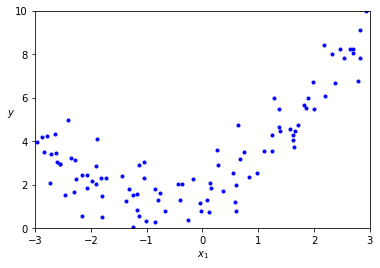

In [26]:
plt.plot(X2, y2, "b.")
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([-3, 3, 0, 10])

In [27]:
# 원래 속성은 x이지만, 특성벡터를 (x,x**2)으로 변환 

X2_poly = np.column_stack((X2,X2**2))

In [28]:
X2_poly[:3]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281]])

In [29]:
# 확장된 훈련 데이터셋에 대해 선형회귀 모델 학습 

poly2_reg = LinearRegression()
poly2_reg.fit(X2_poly, y2)
poly2_reg.intercept_, poly2_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

(-3.0, 3.0, 0.0, 10.0)

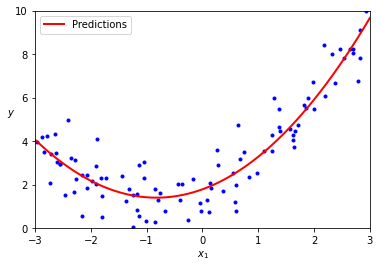

In [31]:
# 학습된 결과를 그림으로 

X2_new=np.linspace(-3, 3, 100).reshape(100, 1)
X2_new_poly = np.column_stack((X2_new,X2_new**2))
y2_new = poly2_reg.predict(X2_new_poly)
plt.plot(X2, y2, "b.")
plt.plot(X2_new, y2_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.axis([-3, 3, 0, 10])

#### `sklearn.preprocessing`모듈의 `PolynomialFeatures`를 이용한 데이터셋 확장 

* 속성이 여러 개인 경우 주어진 데이터셋으로부터 구성하려는 다항식 속성을 직접 구성하지 않고, <span style="color:blue">sklearn.preprocessing 모듈의 PolynomialFeatures 변환기</span>를 이용하면 편리 

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X2_poly2 = poly_features.fit_transform(X2)

In [33]:
# 직접 확장한 데이터셋과 동일함을 확인 

(X2_poly2 == X2_poly).all()     #np.ndarray.all

True

## 모델의 복잡도가 적절한 지를 판단하는 방법: 교차검증, 학습곡선

* 주어진 데이터셋에 고차 다항회귀를 적용하면 보통의 선형회귀나 낮은 차수의 다항회귀보다 훨씬 더 훈련 데이터셋에 잘 맞추려고 함 

* 앞의 예에 1차, 2차, 150차 다항회귀를 적용하고 그 결과를 비교해보면, 고차 다항회귀 모델은 심각하게 훈련 데이터셋에 과대적합, 단순회귀 모델은 과소적합되며 2차 다항회귀 모델이 가장 적절함을 알 수 있음  
> * 주어진 속성에서 다항식 특성으로 확장할 때, 학습이 잘 이루어지도록 스케일링을 적용: <span style="color:blue"> sklearn.preprocessing 모듈의 StandardScaler 변환기 이용</span>


(-3.0, 3.0, 0.0, 10.0)

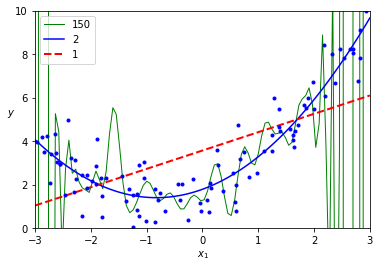

In [34]:
from sklearn.preprocessing import StandardScaler

for color, width, degree in (("g-", 1, 150), ("b-", 1.5, 2), ("r--", 2, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    X2_poly = poly_features.fit_transform(X2)
    X2_poly_scaled = std_scaler.fit_transform(X2_poly)
    lin_reg.fit(X2_poly_scaled, y2)
    
    y2_new_pred = lin_reg.predict(std_scaler.transform(poly_features.transform(X2_new)))
    plt.plot(X2_new, y2_new_pred, color, label=str(degree), linewidth=width)

plt.plot(X2, y2, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([-3, 3, 0, 10])

* 이 경우의 데이터셋은 2차식을 이용하여 생성된 데이터셋이므로 당연한 결과이지만, 일반적인 상황에서 모델이 데이터셋에 과대적합 또는 과소적합되었는지를 판단하기 위해서는 교차검증을 이용   
> * 훈련 데이터셋에서 성능이 좋지만 교차검증 점수가 나쁘다면 모델이 과대적합된 것  
> * 만약 양쪽에서 모두 좋지 않으면 과소적합된 것 

* 또 다른 방법으로는 **학습 곡선**을 살펴보는 것  
> * 학습 곡선은 훈련 데이터셋과 검증 데이터셋에 대한 모델의 성능(RMSE 또는 R^2 등)을 <span style="color:blue">훈련 데이터셋의 크기(또는 학습 반복 횟수)</span>에 대한 함수의 그래프  
> * 실제로는 훈련 데이터셋에서 크기가 다른 부분 데이터셋을 만들어 모델을 여러 번 학습시키면 됨 

* 위 예에서 주어진 2차식 데이터셋이 훈련 데이터셋이라 생각하고, 훈련 데이터셋과 검증 데이터셋으로 나누어 학습 곡선을 그리는 코드를 구현해보자.  
> * MSE, $R^2$을 직접 구현해도 되지만, <span style="color:blue"> sklearn.metrics 모듈의 mean_squared_error와  r2_score</span> 사용 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error#sklearn.metrics.mean_squared_error))

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def plot_learning_curves_pre(model, X, y):  
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) # 여기서 이미 무작위로 섞임
    train_mse, val_mse = [], [] 
    for m in range(2, len(X_train)+1):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        
        train_mse.append(mean_squared_error(y_train[:m], y_train_pred))
        val_mse.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_mse), "b-", linewidth=1, label="train")
    plt.plot(np.sqrt(val_mse), "r-", linewidth=1, label="val")
    plt.legend(loc="upper right", fontsize=10)
    plt.xlabel("Training set size", fontsize=10)
    plt.ylabel("RMSE", fontsize=10)

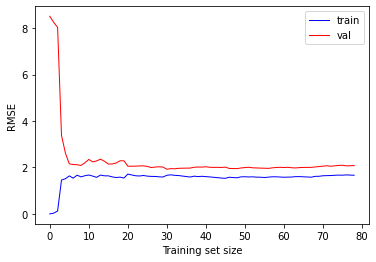

In [36]:
lin_reg = LinearRegression()
plot_learning_curves_pre(lin_reg, X2, y2)

In [37]:
def plot_learning_curves(model, X, y, num_iter,range_y=None, metric='mse'):  
    np.random.seed(42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) # 여기서 이미 무작위로 섞임
    train_score_mean, val_score_mean = np.zeros(len(X_train)-1), np.zeros(len(X_train)-1)
    
    if metric == "r2":
        score_ftn = r2_score  # sklearn.metrics 함수
    else:
        score_ftn = mean_squared_error   # sklearn.metrics 함수
        
    for i in range(num_iter):
        train_score, val_score = [], [] 
        for m in range(2, len(X_train)+1):
            model.fit(X_train[:m], y_train[:m])
            y_train_pred = model.predict(X_train[:m])
            y_val_pred = model.predict(X_val)
            
            train_score.append(score_ftn(y_train[:m], y_train_pred))
            val_score.append(score_ftn(y_val, y_val_pred))
            
        if metric =="r2":
            plt.plot(range(2, len(X_train)+1),train_score, "b-", linewidth=1, alpha = 0.2)
            plt.plot(range(2, len(X_train)+1),val_score, "r-", linewidth=1, alpha = 0.2)
        else:
            plt.plot(range(2, len(X_train)+1),np.sqrt(train_score), "b-", linewidth=1, alpha = 0.2)
            plt.plot(range(2, len(X_train)+1),np.sqrt(val_score), "r-", linewidth=1, alpha = 0.2)
        
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
        train_score_mean +=train_score
        val_score_mean +=val_score
    train_score_mean = train_score_mean/num_iter
    val_score_mean = val_score_mean/num_iter
    if metric=="r2":
        plt.plot(range(2, len(X_train)+1),train_score_mean, "b-", linewidth=2, label="train")
        plt.plot(range(2, len(X_train)+1),val_score_mean, "r-+", linewidth=2, label="val")
        plt.ylabel("$R^2$", fontsize=10)
        plt.ylim((0,1))
    else:
        plt.plot(range(2, len(X_train)+1), np.sqrt(train_score_mean), "b-", linewidth=2, label="train")
        plt.plot(range(2, len(X_train)+1), np.sqrt(val_score_mean), "r-+", linewidth=2, label="val")
        plt.ylabel("RMSE", fontsize=10)
        plt.ylim(bottom=0)
    plt.legend(loc="upper right", fontsize=10)
    plt.xlabel("Training set size", fontsize=10)
    
    if range_y!=None:
        plt.ylim(top=range_y)

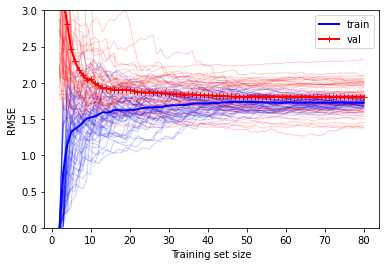

In [38]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X2, y2, 50, 3)

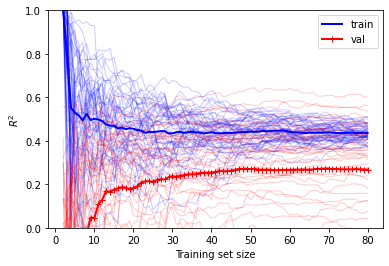

In [39]:
plot_learning_curves(lin_reg, X2, y2, 50, metric='r2')

#### 단순 선형회귀 모델에 대한 학습  곡선 

* 위 결과에서 볼 수 있듯이 훈련 데이터셋의 샘플이 1~2개일 때는 모델이 완벽하게 작동하지만, 샘플 개수가 늘어남에 따라 데이터셋의 비선형성과 잡음으로 인해 완벽하게 학습하는 것이 불가능하므로 평균오차가 커지다가 어느 순간부터 평편해짐 (이 때부터는 훈련 샘플이 늘어나도 성능이 좋아지지 않음) 



* 검증 데이터셋에 대해서는 초기에는 제대로 일반화가 되지 않은 이유로 평균오차가 크다가 학습 정도가 개선됨에 따라 감소하면서 훈련 데이터셋과 가까워짐 



* 훈련 데이터셋과 검증 데이터셋에 대한 두 학습곡선이 거의 평행해지면서 꽤 높은 오차에서 근접하는 것이 과소적합 모델의 전형적인 모습 (반드시 훈련 데이터셋에 대한 평균오차가 낮은 것은 아님)

#### 고차 다항회귀에 대한 학습 곡선 

* $15$ 다항회귀 모델에 대한 학습 곡선을 그려보면 아래에서 보듯이 두 곡선 사이의 공간이 많이 있는데, 이것은 검증 데이터셋에 대한 성능보다 훈련 데이터셋에 대한 성능이 더 좋다는 뜻이고 과대적합 모델의 특징 


* 이 경우에도 더 큰 훈련 데이터셋을 사용하면 두 곡선이 점점 가까워짐 

* $R^2$을 이용하여 성능을 평가하면, 고차 다항회귀 모델의 경우에 훈련 데이터셋에 대해서는 성능이 높지만, 검증 데이터셋에 대한 성능이 낮음을 알 수 있음 

* <span style="color:blue">과대적합이 있는 모델을 개선하는 방법 </span>

> * <span style="color:blue">모델의 복잡도를 낮추는 방법 : 이 경우에는 다항회귀 모델에서 차수를 낮추는 것 </span>
$$$$
> * <span style="color:blue">훈련 샘플의 개수를 늘리는 것 : 실제로는 훈련 데이터셋을 추가로 얻는 것이 힘들 수 있음 </span>
$$$$
> * <span style="color:blue">다음 시간에 공부할 **규제(regulariztion)**을 적용하는 것 </span>

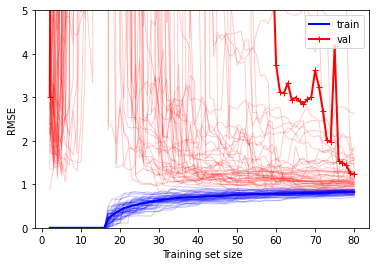

In [40]:
poly_features = PolynomialFeatures(degree=15, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
    
X2_poly = poly_features.fit_transform(X2)
X2_poly_scaled = std_scaler.fit_transform(X2_poly)

plot_learning_curves(lin_reg, X2_poly_scaled, y2, 50, 5)

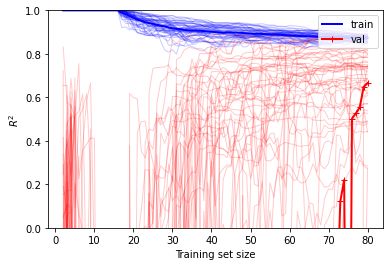

In [43]:
plot_learning_curves(lin_reg, X2_poly_scaled, y2, 50, metric="r2")

## 코딩 연습문제 

1) 위에서 다룬 (X2, y2) 데이터셋에 대해 2차 다항회귀 모델의 학습 곡선을 RMSE, $R^2$에 대해 각각 그려보시오. 

2) `sklearn.metrics`에서 회귀(regression)과 관련된 여러 측도에 대해 알아보시오. ([API](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics))

## 이론 연습문제  
1) 위 설명 중 식 (2)를 증명하시오. 

2) 위 설명 중 <span style="color:red"> check 1</span>을 증명하시오. 

3) 위 설명 중 식 (1)에서 $n=1$인 경우에 $\displaystyle{\bar x= \dfrac 1 m \sum_{i=1}^m x_i,\, \bar y= \dfrac 1 m \sum_{i=1}^m y_i}$라 두면, 다음이 성립함을 확인하시오. 
$$
\hat{\theta}_1 = \dfrac{\sum_{i=1}^m (x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^m (x_i-\bar x)^2},\quad 
\hat{\theta}_0 = \bar y -\hat{\theta}_1 \bar x$$

4) 다음은 <span style="color:red"> check 2</span>를 증명하는 핵심단계를 개략적으로 쓴 것이다. 계산과정을 채워서 증명을 완성하시오. (아래에서 기댓값과 분산은 각각 $\mathbf X$가 주어졌을 때 $\mathbf y$에 대한 기댓값과 분산)
> * $p(y|\mathbf x)=N(\mathbf x^{\rm T}\boldsymbol{\theta},\sigma^2)$이므로 $\text{E}(\mathbf y)=\mathbf X\boldsymbol{\theta}$이고, 
$\hat{\boldsymbol{\theta}}=(\mathbf X^{\rm T}\mathbf X)^{-1}\mathbf X^{\rm T}\mathbf y$에서 
$$\text{E}(\hat{\boldsymbol{\theta}})=(\mathbf X^{\rm T}\mathbf X)^{-1}\mathbf X^{\rm T}\mathbf X\boldsymbol{\theta} =\boldsymbol{\theta}$$  
> * 또, $\hat{\boldsymbol{\theta}} - \text{E}(\hat{\boldsymbol{\theta}}) = (\mathbf X^{\rm T}\mathbf X)^{-1}\mathbf X^{\rm T}(\mathbf y -\mathbf X\boldsymbol{\theta})$  
> * 따라서 
$$\text{V}(\hat{\boldsymbol{\theta}})=\text{E}\bigl((\hat{\boldsymbol{\theta}}-\text{E}(\hat{\boldsymbol{\theta}}))(\hat{\boldsymbol{\theta}}-\text{E}(\hat{\boldsymbol{\theta}}))^{\rm T}\bigr)
=(\mathbf X^{\rm T}\mathbf X)^{-1}\mathbf X^{\rm T}\text{V}(\mathbf y-\mathbf X\boldsymbol{\theta})\mathbf X
(\mathbf X^{\rm T}\mathbf X)^{-1}$$  
> * 한편, 모델의 가정(본문 설명 <span style="color:blue">(*)</span>참고)에서 $\mathbf y-\mathbf X\boldsymbol{\theta}$ 각 성분은 독립동일분포 $N(0,\sigma^2)$를 따르므로 $\text{V}(\mathbf y-\mathbf X\boldsymbol{\theta})=\sigma^2 I$  
> * 결론적으로 $\text{V}(\hat{\boldsymbol{\theta}})=\sigma^2 (\mathbf X^{\rm T}\mathbf X)^{-1}$

5) 위 문제 3)과 4)로부터 단순 선형회귀 모델(n=1인 경우)의 경우에 다음이 성립함을 확인하시오. 
$$
\begin{aligned}
\text{SE}(\hat{\theta}_0)^2=&\text{V}(\hat{\theta}_0)=\sigma^2 \left(\dfrac 1 n + \dfrac{\bar x ^2}{\sum_{i=1}^m (x_i -\bar x)^2} \right)\\
\text{SE}(\hat{\theta}_1)^2=&\text{V}(\hat{\theta}_1)=\dfrac{\sigma^2}{\sum_{i=1}^m (x_i-\bar x)^2}
\end{aligned}
$$

6) 배치 경사하강법을 사용하여 학습을 시키면서 에포크마다 검증 데이터셋에 대한 오차를 그래프로 나타내었더니 오차가 일정하게 상승하고 있다면 어떤 일이 일어나고 있는 것인가? 어떻게 하면 이 문제를 해결할 수 있는지에 대해 설명하시오. 